# Caso 4: Breast cancer Clasificación

# Paso 1: muestra

## 1.1 Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

## 1.2 Cargar conjunto de datos
Cargue el conjunto de datos. Comprueba su tamaño. Eche un vistazo preliminar a los datos.

In [2]:
dataset = pd.read_csv("Clasificacion-breast-cancer.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- El conjunto de datos tiene 33 características. 
- Las columnas del 0 al 32 contienen datos significativos (569 valores no nulos) relacionados con las características del cáncer de mama.
- La columna(Unnamed: 32) está vacía ya que tiene 0 valores no nulos. 
- La columna de diagnóstico es clave para clasificar los casos y ser la variable objetivo.

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Este dataset contiene características relacionadas con las propiedades físicas de células, que ayudan en la clasificación de tumores en malignos (M) o benignos (B), a continuación se presentará cada columna de manera detallada:

- id: Identificador único de cada observación o paciente.
- diagnosis: Indica si el diagnóstico del tumor es maligno ("M") o benigno ("B").
- radius_mean: Promedio de los radios de las células en la imagen del tumor.
- texture_mean: Promedio de la desviación estándar, lo cual describe la "rugosidad" de la textura de las células.
- perimeter_mean: Promedio del perímetro de las células.
- area_mean: Promedio del área de las células, lo cual ayuda a identificar el tamaño general del tumor.
- smoothness_mean: Suavidad promedio de los bordes de las células.
- compactness_mean: Promedio de la compacidad de las células, indica cuán compactas o densas son.
- concavity_mean: Promedio de la concavidad de las células.
- concave points_mean: Promedio de la cantidad de puntos cóncavos en los bordes de las células.
- texture_worst: Valor máximo de la textura entre todas las células del tumor.
- perimeter_worst: Valor máximo del perímetro entre todas las células del tumor.
- area_worst: Valor máximo del área entre todas las células del tumor.
- smoothness_worst: Valor máximo de la suavidad entre todas las células.
- compactness_worst: Valor máximo de la compacidad entre todas las células.
- concavity_worst: Valor máximo de la concavidad entre todas las células.
- concave points_worst: Valor máximo de los puntos cóncavos entre todas las células.
- symmetry_worst: Valor máximo de la simetría entre todas las células.
- fractal_dimension_worst: Valor máximo de la dimensión fractal entre todas las células, indicando la complejidad de los bordes.
- Unnamed: 32: Columna sin nombre que contiene valores nulos (NaN).

## 1.3 Verificar el tamaño del conjunto de datos

A continuación, verifiquemos el tamaño del conjunto de datos.

In [ ]:
rows, columns = dataset.shape
print(f"Filas: {rows}, Columnas: {columns}")

(569, 33)

## 1.4 Procesamiento de datos

Verificamos la cantidad de valores nulos (o faltantes) en cada columna

In [5]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- La columna Unnamed: 32 debería ser eliminada para limpiar el dataset porque tiene 569 valores nulos. Además la columna 32 no tiene una caracterísca definida por ende lo llaman llaman por defecto Unnamed: 32.
- El id es un identificador único asignado a cada fila, no contiene información útil sobre las características que afectan el resultado o la etiqueta que se está prediciendo por ello se debe eliminar.
- El resto del dataset está listo para análisis y modelado, dado que no hay valores nulos en las características importantes.

In [6]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [7]:
dataset = dataset.drop(columns=['id'])

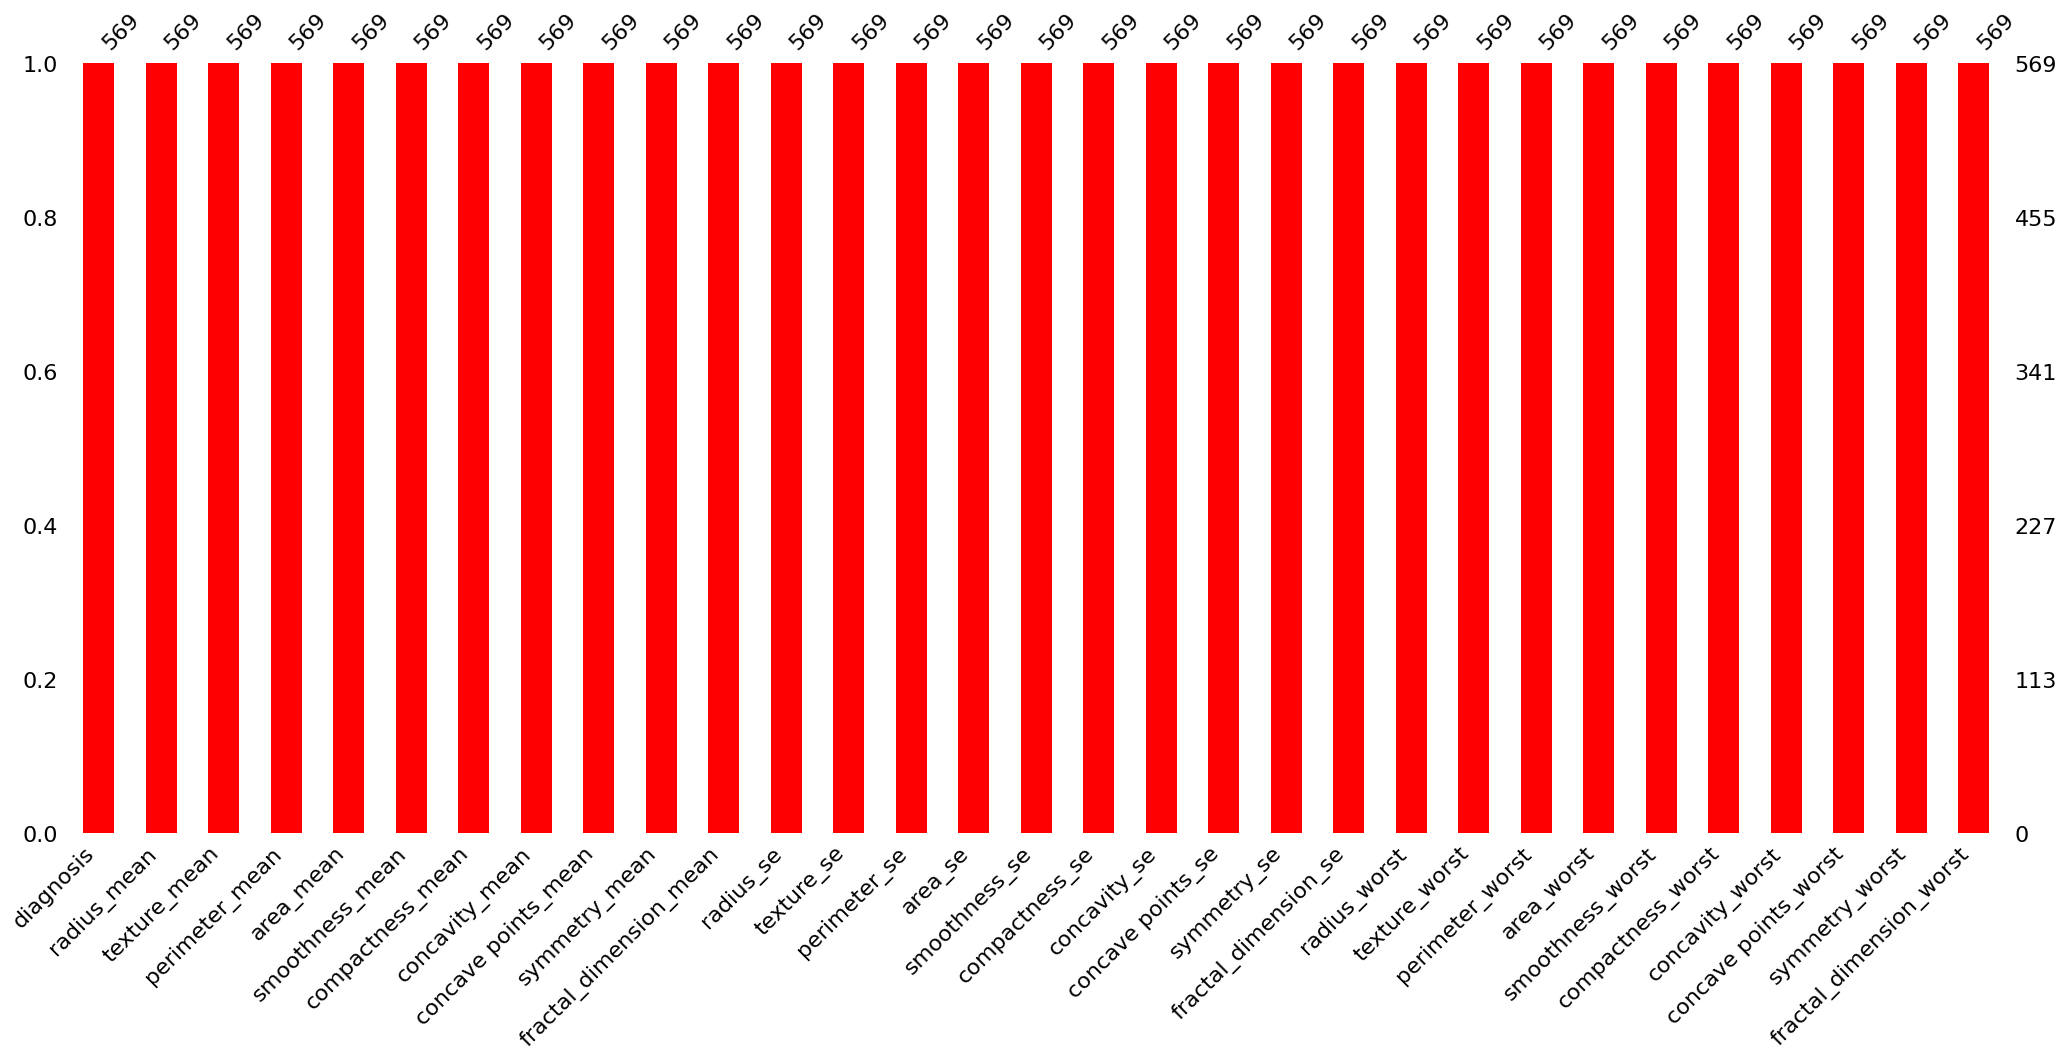

In [8]:
msno.bar(dataset, color="red")
plt.show()

- Eje X: Cada barra representa una columna en el dataset, con el nombre de la columna mostrado debajo. 
- Eje Y: Muestra la cantidad de datos presentes, es decir, el número de valores no nulos por columna.
- Altura de las Barras: Si la barra está completa hasta la parte superior, significa que todos los datos están presentes en esa columna (sin valores nulos).
- En nuestro caso el gráfico las barras se visualiza que todas las columnas en el dataset están completamente llenas de datos válidos, es decir, no tienen valores nulos. 

## Paso 2: Visualización

## 2.1 EDA

Para realizar un análisis exploratorio de datos (EDA), permitiéndote ver cómo se distribuyen los valores en cada columna del DataFrame.

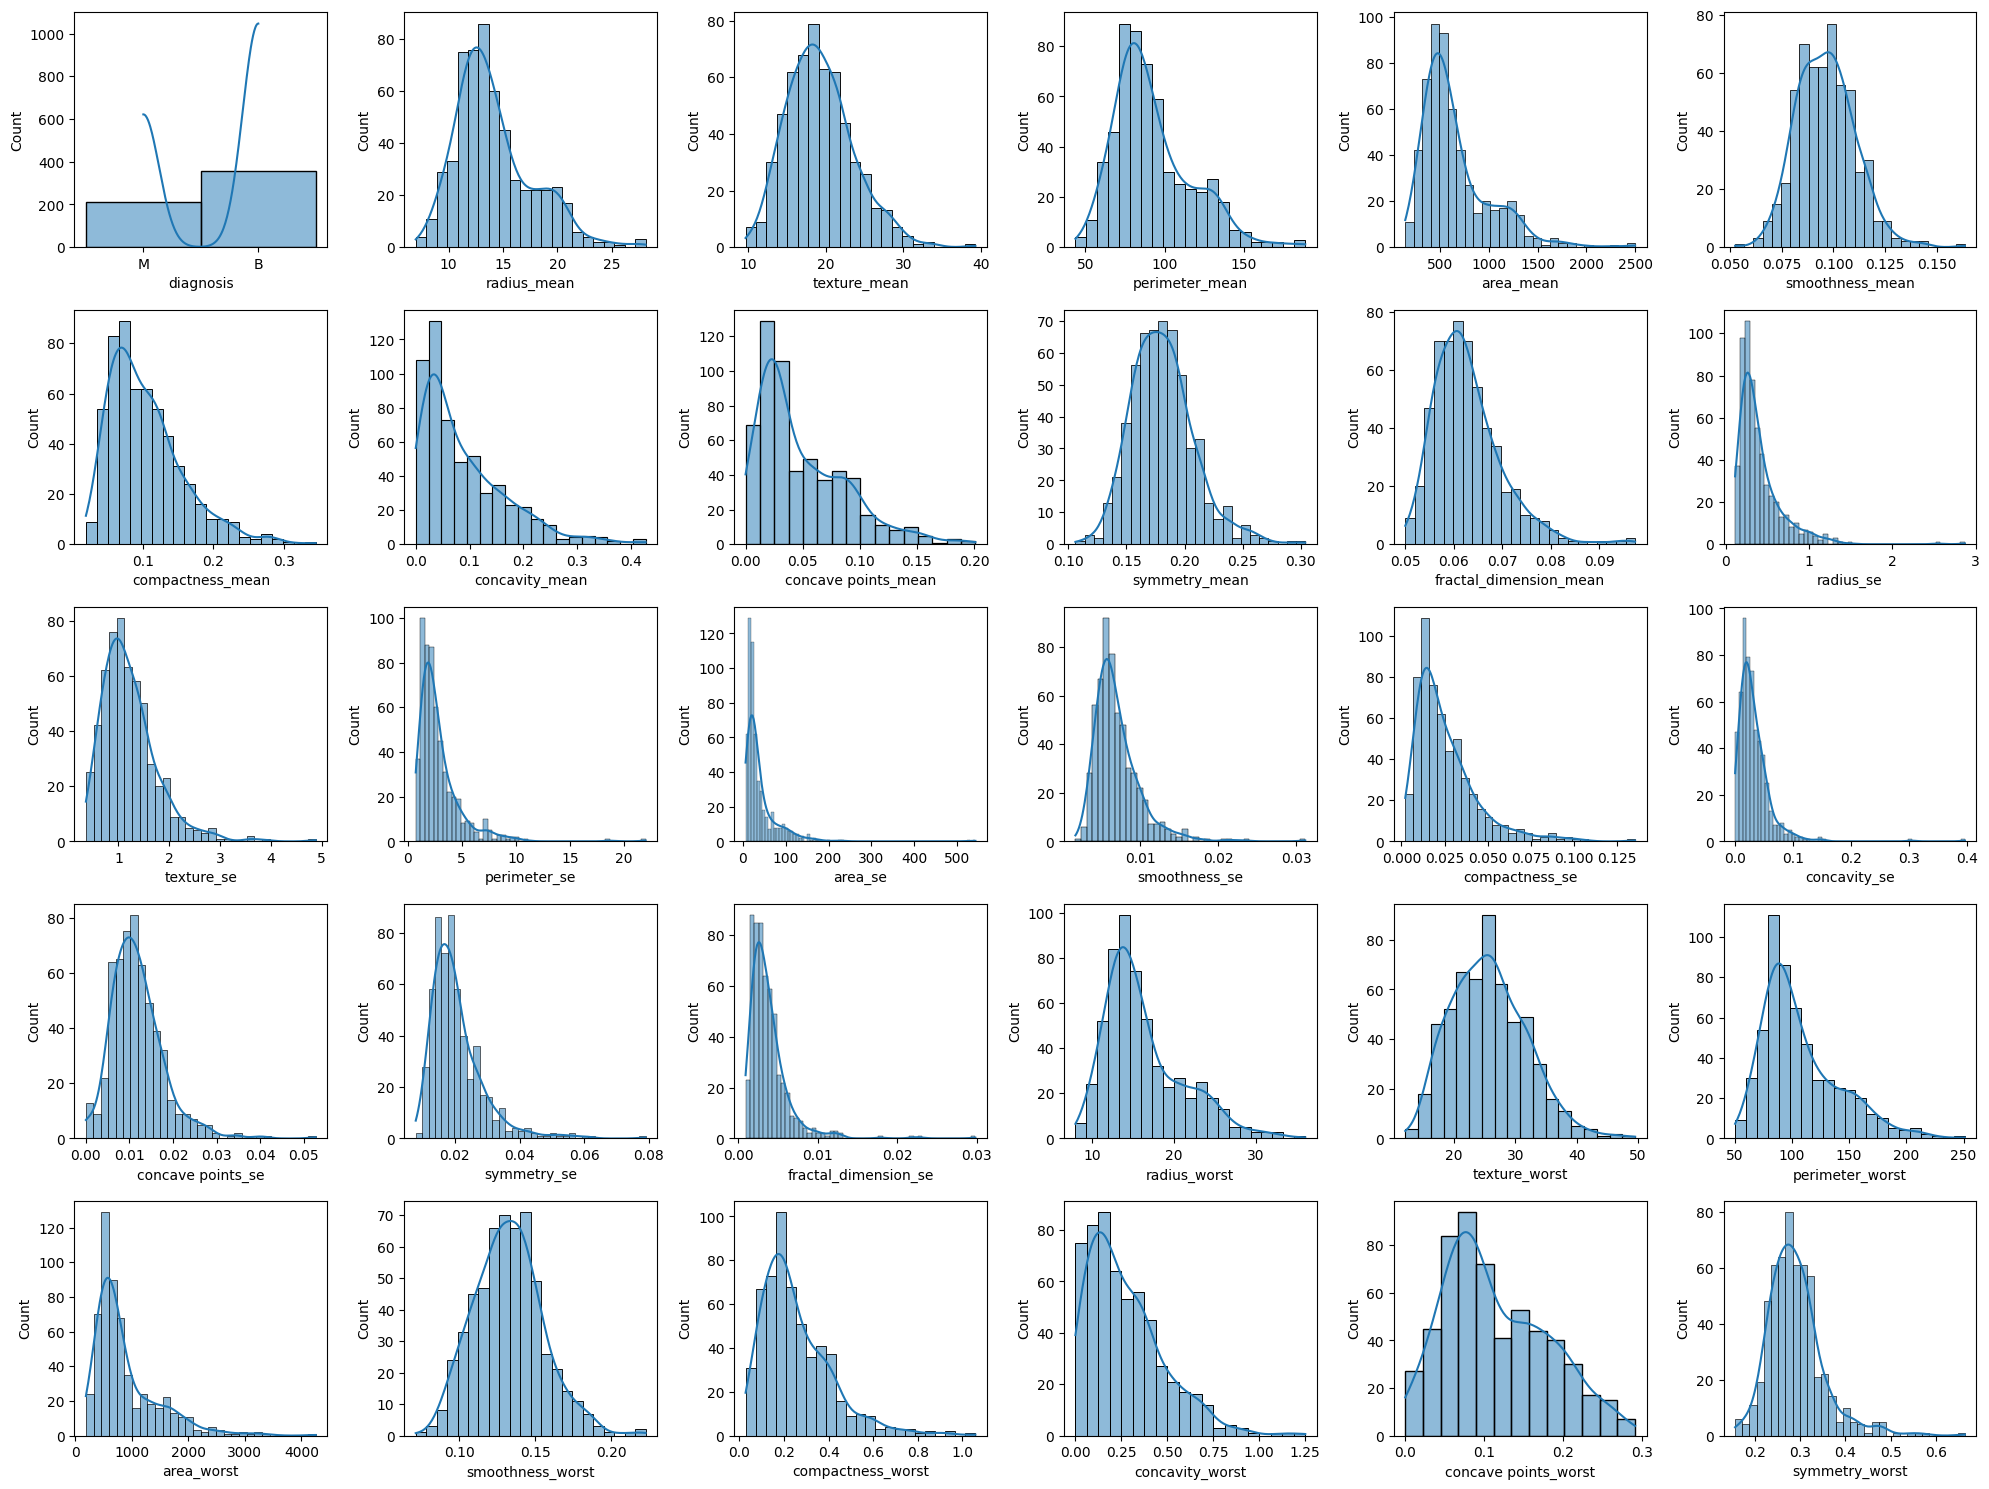

In [9]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in dataset:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(dataset[column], kde=True)  
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

- Hay un desbalance de clases claro en la variable diagnosis, con más tumores benignos que malignos.
- La mayoría de las variables relacionadas con las medidas físicas (radio, perímetro, área, etc.) presentan distribuciones sesgadas a la derecha, lo que significa que los tumores tienden a ser más pequeños en la mayoría de los casos, con algunos valores extremos que representan tumores más grandes.
- Variables como smoothness_mean y symmetry_mean muestran distribuciones más simétricas. Esto sugiere que estas características son más consistentes entre los tumores.
- Las variables como radius_mean, perimeter_mean, y area_mean tienen una distribución sesgada a la derecha. Esto indica que, aunque la mayoría de los tumores son pequeños, hay algunos casos raros con tamaños mucho mayores, que podrían ser más peligrosos y relevantes para el diagnóstico.

## 2.2 Matriz correlacional

La matriz de correlación que presentas muestra la relación entre diferentes variables, donde cada celda indica el coeficiente de correlación entre dos variables específicas.

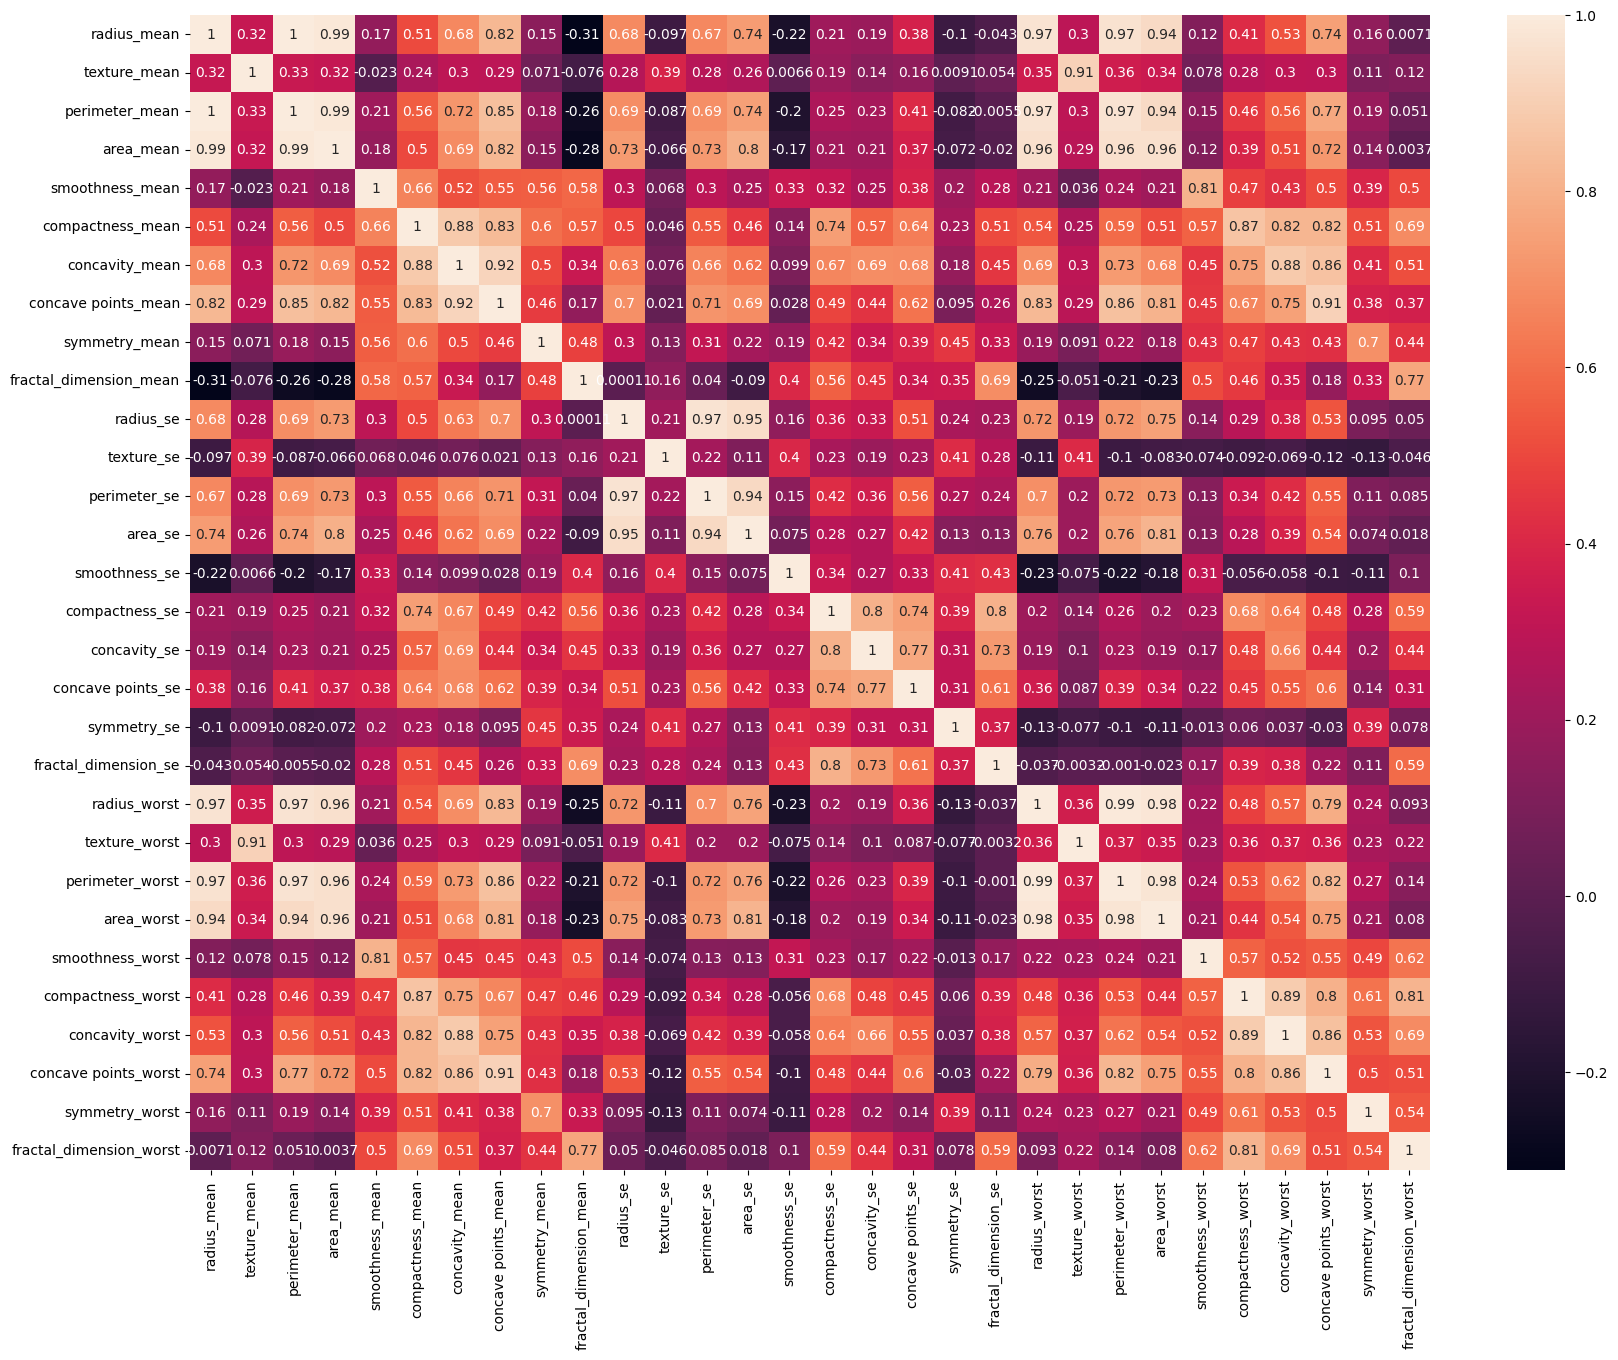

In [10]:
df_temp=dataset.drop(['diagnosis'],axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(df_temp.corr(), annot=True) 
plt.show()

1. Valores altos de correlación positiva indican que dos variables tienen una relación directa; es decir, cuando una aumenta, la otra también lo hace. A continuación listaré la correlación más alta entre diferentes variables.

*Correlacion de 0.99 entre las variables:*
- radius_mean y area_mean
- perimeter_mean y area_mean
- area_mean y radius_mean
- area_mean y perimeter_mean
- radius_worst y perimeter_worst
- perimeter_worst y radius_worst

2. Valores altos de correlación negativa indican una relación inversa entre las variables; cuando una variable aumenta, la otra tiende a disminuir. sin embargo, hay pocas correlaciones negativas fuertes en la matriz. 

*Correlacion de -0.31 entre las variables:*
- radius_mean y fractal_dimension_mean
- fractal_dimension_mean y radius_mean

3. Variables fuertemente correlacionadas con ellas mismas (diagonal principal, que es 1), lo cual es normal, ya que cada variable tiene una correlación perfecta consigo misma.

## Paso 3: Ver desbalance de datos

Realizamos la distribución de las clases, lo cual es crucial para entender el balance del conjunto de datos y para determinar si es necesario aplicar técnicas de balanceo.

In [11]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda val:1 if val=='M' else 0)

In [12]:
class_counts = dataset['diagnosis'].value_counts()
print(class_counts)

diagnosis
0    357
1    212
Name: count, dtype: int64


- Benigno (B=0): 357 casos
- Maligno (M=1): 212 casos

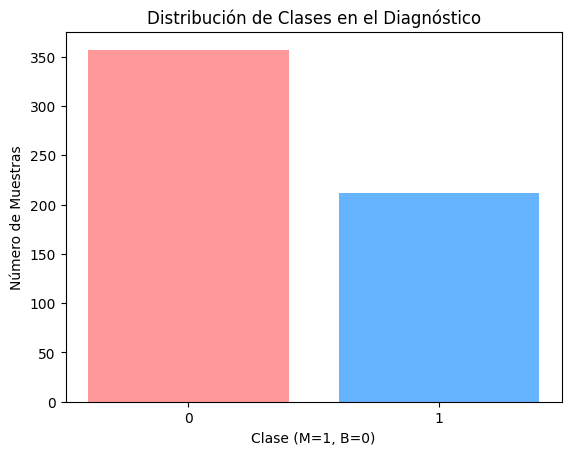

In [13]:
class_counts = dataset['diagnosis'].value_counts()
pastel_colors = ['#ff9999', '#66b3ff']
plt.bar(class_counts.index, class_counts.values, color=pastel_colors)
plt.title('Distribución de Clases en el Diagnóstico')
plt.xlabel('Clase (M=1, B=0)')
plt.ylabel('Número de Muestras')
plt.xticks(class_counts.index)
plt.show()

- Hay un total de 357 casos benignos y 212 casos malignos, lo que significa que hay más ejemplos de tumores benignos que malignos. 
- Este desbalance de clases no es tan significativo por ello no se aplicará algún tipo de generador de datos sintéticos. 

## Paso 4: Modelado

Esta sección,el objetivo es preparar los datos y aplicar diferentes modelos de clasificación para la detección de cáncer de mama. Inicialmente se separan las características y la etiqueta, los datos se dividen en conjuntos de entrenamiento y prueba y se aplica la validación cruzada para medir la precisión. Se evalúan cinco modelos de clasificación:

- DT: Árbol de Decisión
- KNN: K-Nearest Neighbors
- SVM: Support Vector Machine
- LR: Regresión Logística
- Naive Bayes: Naive Bayes

Finalmente, se calculará el AUC de cada modelo para una evaluación más completa.

## 4.1 Separación de características y etiquetas

Esta separación es esencial para entrenar un modelo.

In [14]:
X=dataset.drop('diagnosis', axis=1)
y=dataset['diagnosis']

## 4.2 División en conjuntos de entrenamiento y prueba

Dividir los datos en conjuntos de entrenamiento y prueba permite evaluar el rendimiento del modelo de manera imparcial.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 4.3 Lista de modelos

A continuación,  escalamos para asegurar que los modelos funcionen de manera eficiente y efectiva, logrando un mejor rendimiento. 

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Luego listamos nuestros cinco modelos de clasificación.

In [17]:
List_Classification_Models = [
    ('LR', LogisticRegression(max_iter=10000, random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=0,probability=True)),
    ('NaiveBayes', GaussianNB()),
    ('DT', DecisionTreeClassifier(random_state=0))
]

## 4.4 Validación cruzada

Para realizar predicciones después de ajustar los modelos y evaluarlo.

In [18]:
knn_params = {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}
svm_params = {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf'], 'model__gamma': ['scale', 'auto']}
Model_Eval_Score = []
predictions = {}

for name, model in List_Classification_Models:
    if name == 'KNN':
        knn_pipeline = Pipeline([('scaler', StandardScaler()),('model', KNeighborsClassifier())])
        grid_knn = GridSearchCV(knn_pipeline, knn_params, cv=10, scoring='accuracy')
        grid_knn.fit(X_train, y_train)
        model = grid_knn.best_estimator_
    elif name == 'SVM':
        svm_pipeline = Pipeline([('scaler', StandardScaler()),('model', SVC(probability=True))])
        grid_svm = GridSearchCV(svm_pipeline, svm_params, cv=10, scoring='accuracy')
        grid_svm.fit(X_train, y_train)
        model = grid_svm.best_estimator_
    else:
        pipeline = Pipeline([('scaler', StandardScaler()),('model', model)])
        model = pipeline
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    CV_Results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    Model_Eval_Score.append(CV_Results)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score, index=['LR', 'KNN', 'SVM', 'NaiveBayes', 'DT'])
print("Resultados de la validación cruzada para cada modelo:\n")
Table_Results_CV = CV_IterationsBy_model.T
Table_Results_CV

Resultados de la validación cruzada para cada modelo:



,LR,KNN,SVM,NaiveBayes,DT
0,0.975000,0.950,0.950000,0.925000,0.900000
1,1.000000,0.950,0.975000,0.900000,0.925000
2,0.975000,0.925,0.925000,0.875000,0.875000
3,0.975000,0.975,1.000000,0.950000,0.925000
4,1.000000,0.950,1.000000,0.950000,0.925000
5,0.975000,1.000,1.000000,0.950000,0.925000
6,0.925000,0.925,0.975000,0.950000,0.950000
7,0.950000,0.950,0.925000,0.925000,0.850000
8,1.000000,1.000,0.974359,0.974359,0.897436
9,0.974359,1.000,1.000000,1.000000,0.923077


*Regresión Logística (LR):*

- Rango de precisión: 0.925 a 1.000.
- Muestra un rendimiento muy consistente y alto, con múltiples ejecuciones alcanzando el 1.000.

*K-Nearest Neighbors (KNN):*

- Rango de precisión: 0.925 a 1.000.
- Tiene un rendimiento variable; aunque alcanza el 1.000 en varias ocasiones, también muestra valores más bajos (0.925).

*Support Vector Machine (SVM):*

- Rango de precisión: 0.925 a 1.000.
- Al igual que LR, muestra un desempeño alto y alcanza el 1.000 en varias ejecuciones, pero presenta algo de variabilidad en algunos casos.

*Naive Bayes:*

- Rango de precisión: 0.875 a 1.000.
- Su rendimiento es el más bajo entre todos los modelos, con una puntuación máxima de 1.000 solo en una ocasión y valores más bajos en otras.

*Árboles de Decisión (DT):*

- Rango de precisión: 0.850 a 0.950.
- Tiene el rendimiento más bajo en comparación con los otros modelos, mostrando una falta de consistencia y alcanzando su máximo en 0.950.

In [19]:
mean_accuracy_per_model = Table_Results_CV.mean()
print("\nPromedio de precisión (accuracy) para cada modelo:\n")
print(mean_accuracy_per_model)


Promedio de precisión (accuracy) para cada modelo:

LR            0.974936
KNN           0.962500
SVM           0.972436
NaiveBayes    0.939936
DT            0.909551
dtype: float64


- Modelos Recomendados: La Regresión Logística y SVM son los más recomendables basándose en su precisión promedio. Ambos ofrecen un alto rendimiento y son relativamente consistentes.
- KNN puede ser una opción viable, pero sería beneficioso realizar un ajuste adicional para optimizar su desempeño.
- Naive Bayes y Árboles de Decisión pueden al no ser tan efectivo a diferencia de otros modelos, podrían requerir un análisis más profundo o ser considerados como opciones secundarias.

## Paso 5: Matriz de confusión y AUC

## 5.1 Modelo de Decision Tree

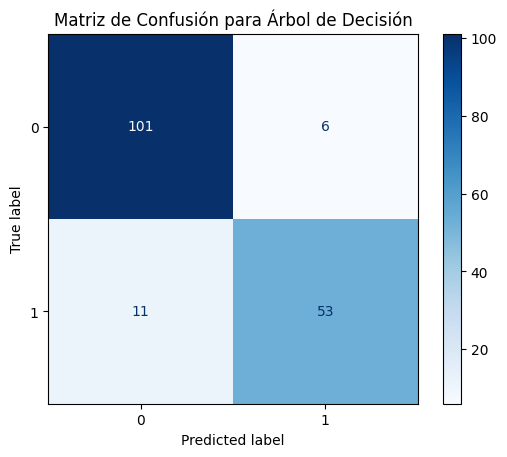

In [20]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.show()

- Verdaderos Negativos: Hay 101 casos donde el modelo predijo correctamente la clase 0 (Benigno) y el valor real también era 0.
- Falsos Positivos: Hay 6 casos donde el modelo predijo la clase 1 (Maligno) cuando en realidad era de la clase 0 (Benigno).
- Falsos Negativos: Hay 11 casos donde el modelo predijo la clase 0 (Benigno) cuando en realidad era de la clase 1 (Maligno).
- Verdaderos Positivos: Hay 53 casos donde el modelo predijo correctamente la clase 1 (Maligno) y el valor real también era 1.

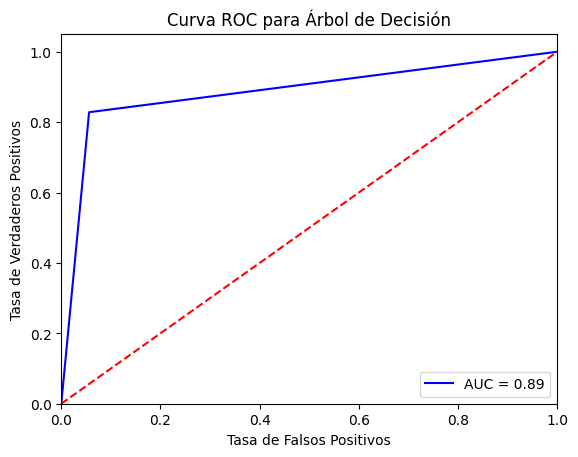

Área bajo la curva (AUC) para Árbol de Decisión: 0.8860



In [21]:
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', label='AUC = %0.2f' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc='lower right')
plt.show()
print(f"Área bajo la curva (AUC) para Árbol de Decisión: {roc_auc_dt:.4f}\n")

El AUC de 0.8860 indica que el modelo tiene una alta capacidad para distinguir entre las clases (benigno y maligno), lo que refleja un muy buen rendimiento en términos de clasificación. Esto respalda la interpretación de la matriz de confusión, donde se observó un bajo número de errores.

## 5.2 Modelo de K-Nearest Neighbors

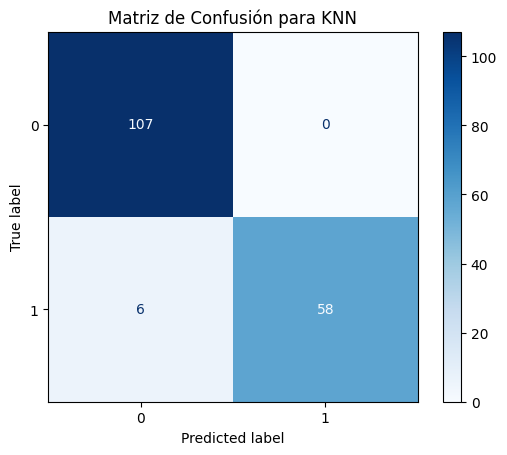

In [22]:
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())])
grid_knn = GridSearchCV(knn_pipeline, knn_params, cv=10, scoring='roc_auc')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=best_knn.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para KNN')
plt.show()

- Verdaderos Negativos: 107 casos fueron correctamente clasificados como 0. Esto significa que el modelo identificó correctamente 106 instancias de la clase negativa.
- Falsos Positivos: 0 casos fueron clasificados incorrectamente como 0 cuando en realidad era 1. 
- Falsos Negativos: 6 casos fueron clasificados como 1 cuando en realidad eran 0. Este es un error tipo II, donde se clasifica incorrectamente una instancia negativa como positiva.
- Verdaderos Positivos: 58 casos fueron correctamente clasificados como 1, indicando que el modelo acertó en identificar estas instancias positivas.

El modelo KNN tiene un buen desempeño, con una alta cantidad de clasificaciones correctas en ambas clases. Los errores de clasificación son mínimos: hay solo 0 falso positivo y 6 falsos negativos. Esto sugiere que el modelo es preciso, pero existen algunos errores en la identificación de instancias de la clase positiva (1).

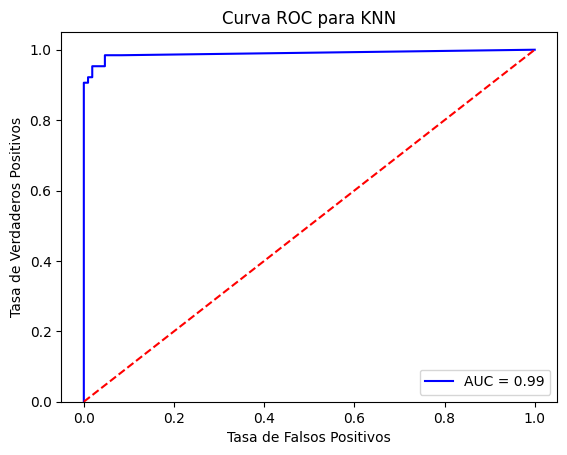

Área bajo la curva (AUC) para KNN: 0.9893



In [23]:
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', label='AUC = %0.2f' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para KNN')
plt.legend(loc='lower right')
plt.show()
print(f"Área bajo la curva (AUC) para KNN: {roc_auc_knn:.4f}\n")

La curva ROC muestra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos para distintos umbrales de clasificación. Una curva que se aproxima a la esquina superior izquierda indica un modelo con alta capacidad de discriminación, ya que maximiza los verdaderos positivos mientras minimiza los falsos positivos. El valor del AUC es de 0.9893, que se acerca a 1. Esto indica que el modelo tiene una excelente habilidad para distinguir entre las clases. 

## 5.3 Modelo de Regresión Logística

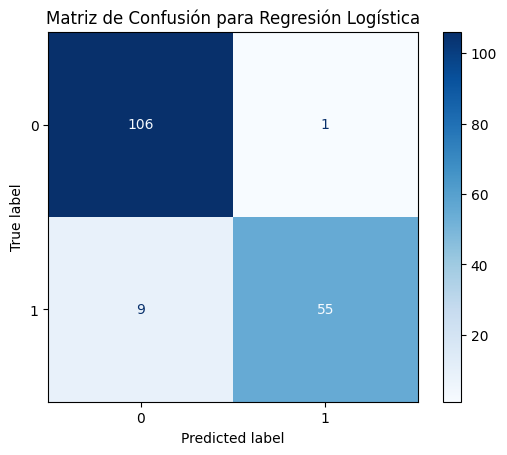

In [24]:
lr_model = LogisticRegression(max_iter=10000, random_state=0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Regresión Logística')
plt.show()

- Verdaderos Negativos: 106 casos fueron correctamente clasificados como clase 0. Esto significa que el modelo identificó correctamente 106 instancias que no tienen cáncer (o son negativas).
- Falsos Positivos: 1 caso fue incorrectamente clasificados como clase 1. Aquí, el modelo predijo que este caso era positivo (cáncer presente) cuando en realidad era negativo. Esto es un error de tipo I.
- Falsos Negativos: 9 casos de clase 1 fueron incorrectamente clasificados como clase 0. Esto significa que el modelo no logró identificar correctamente 9 instancias que sí tienen cáncer, lo que representa un error de tipo II.
- Verdaderos Positivos: 55 casos fueron correctamente clasificados como clase 1. Aquí, el modelo identificó correctamente 53 instancias que tienen cáncer.

El modelo muestra una alta especificidad, ya que tiene un alto número de verdaderos negativos (106) y muy pocos falsos positivos (1). Esto sugiere que el modelo es confiable al identificar a los pacientes sin cáncer.

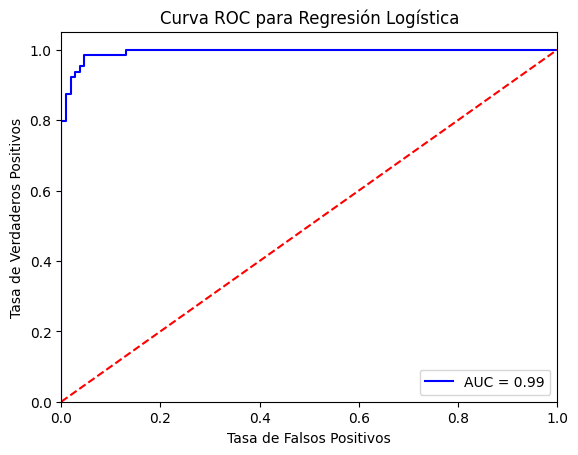

Área bajo la curva (AUC) para Regresión Logística: 0.9939



In [25]:
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', label='AUC = %0.2f' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Regresión Logística')
plt.legend(loc='lower right')
plt.show()
print(f"Área bajo la curva (AUC) para Regresión Logística: {roc_auc_lr:.4f}\n")

La gráfica muestra una curva ROC (Receiver Operating Characteristic) para un modelo de regresión logística, que evalúa la capacidad de clasificación del modelo en términos de tasa de verdaderos positivos (sensibilidad) frente a la tasa de falsos positivos.
El área bajo la curva (AUC) es de 0.9939, lo que indica un rendimiento excelente, ya que un AUC cercano a 1 significa que el modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas. En resumen, este modelo de regresión logística es altamente preciso en sus predicciones, con una baja tasa de falsos positivos y una alta tasa de verdaderos positivos.

## 5.4 Modelo de Naive Bayes

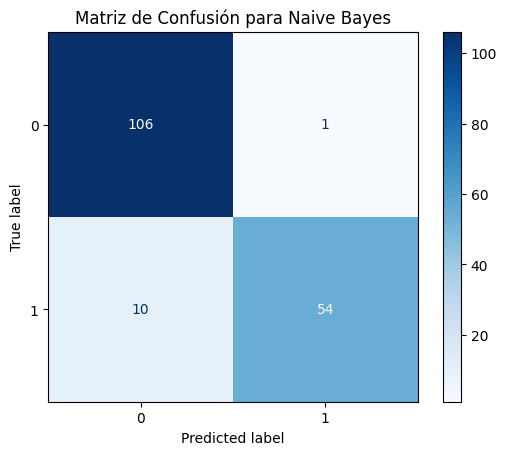

In [26]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para Naive Bayes')
plt.show()

- Verdaderos Negativos: Hay 106 casos donde el modelo predijo correctamente la clase 0 (Benigno) cuando el valor real también era 0.
- Falsos Positivos: Hay 1 caso donde el modelo predijo la clase 1 (Maligno) cuando en realidad era de la clase 0 (Benigno).
- Falsos Negativos: Hay 10 casos donde el modelo predijo la clase 0 (Benigno) cuando en realidad era de la clase 1 (Maligno).
- Verdaderos Positivos: Hay 54 casos donde el modelo predijo correctamente la clase 1 (Maligno) cuando el valor real también era 1.

Este modelo Naive Bayes tiene una alta precisión para identificar casos de la clase 0 (Benigno), pero tiene un rendimiento muy bajo para la clase 1 (Maligno). 

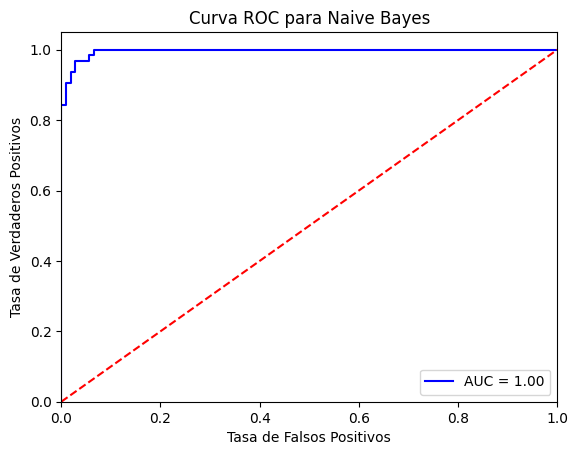

Área bajo la curva (AUC) para Naive Bayes: 0.9961



In [27]:
y_proba_naive = nb_model.predict_proba(X_test)[:, 1]
fpr_naive, tpr_naive, _ = roc_curve(y_test, y_proba_naive)
roc_auc_naive = auc(fpr_naive, tpr_naive)
plt.figure()
plt.plot(fpr_naive, tpr_naive, color='blue', label='AUC = %0.2f' % roc_auc_naive)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Naive Bayes')
plt.legend(loc='lower right')
plt.show()
print(f"Área bajo la curva (AUC) para Naive Bayes: {roc_auc_naive:.4f}\n")

El AUC de 0.9961 indica que el modelo tiene una alta capacidad para diferenciar entre las clases (benigno y maligno), ya que se acerca a 1, lo que sugiere un rendimiento robusto en términos de clasificación.

## 5.5 Modelo de Support Vector Machine

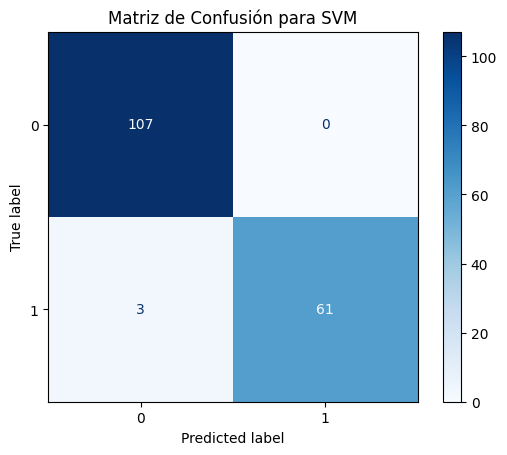

In [28]:
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('model', SVC(probability=True))])
grid_svm = GridSearchCV(svm_pipeline, svm_params, cv=10, scoring='roc_auc')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=best_svm.classes_).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para SVM')
plt.show()

- Verdaderos Negativos: 107 casos fueron correctamente clasificados como 0, indicando que el modelo identificó correctamente estas instancias de la clase negativa.
- Falsos Positivos: 0 casos fueron clasificados incorrectamente como 0 cuando en realidad era 1.
- Falsos Negativos: 3 casos fueron clasificados como 1 cuando en realidad eran 0, un error tipo II, donde se confunde una instancia negativa como positiva.
- Verdaderos Positivos: 61 casos fueron correctamente clasificados como 1, lo que indica que el modelo acertó en estas instancias de la clase positiva.

El modelo SVM tiene un desempeño muy bueno, con la mayoría de las instancias clasificadas correctamente. Solo hay 0 error en falsos positivos y 3 en falsos negativos, lo que sugiere que el modelo es preciso en identificar ambas clases.

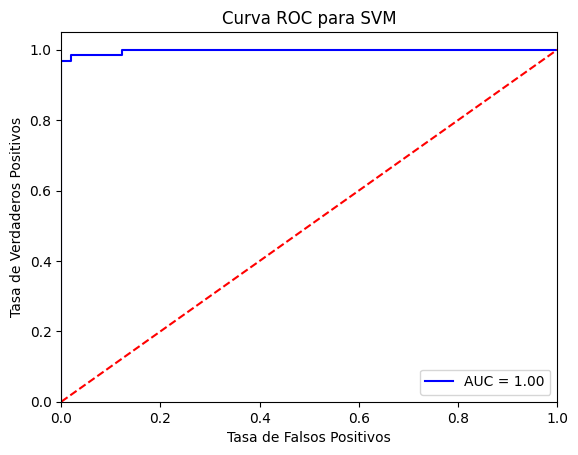

Área bajo la curva (AUC) para SVM: 0.9978



In [29]:
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue', label='AUC = %0.2f' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para SVM')
plt.legend(loc='lower right')
plt.show()
print(f"Área bajo la curva (AUC) para SVM: {roc_auc_svm:.4f}\n")

En esta gráfica, el modelo se ajusta muy bien a los datos, ya que la curva azul está muy cerca del punto superior izquierdo, lo cual indica una alta capacidad para distinguir entre las clases. El área bajo la curva (AUC) es de aproximadamente 0.9978, lo cual es casi perfecto. Un AUC cercano a 1 indica que el modelo es muy efectivo en la clasificación, logrando una excelente discriminación entre las clases positivas y negativas.

## Conclusión

Regresión Logística (LR) es el mejor modelo con un promedio de precisión de 0.974936. Este rendimiento indica que LR tiene una alta capacidad para clasificar correctamente los datos en comparación con los otros modelos evaluados. Además, su rendimiento es consistente a lo largo de las diferentes ejecuciones, alcanzando la puntuación perfecta de 1.000 en varias instancias durante la validación cruzada. SVM.

**Comparativa con Otros Modelos:**

- Support Vector Machine (SVM), con una precisión promedio de 0.972436, es también un modelo fuerte y cercano a LR, ofreciendo resultados comparables en muchas ocasiones. Esto lo convierte en una excelente alternativa si se desea explorar un enfoque diferente.
- K-Nearest Neighbors (KNN) muestra un rendimiento sólido con una precisión promedio de 0.962500, pero su variabilidad en los resultados sugiere que puede ser más sensible a la selección de parámetros y requerir un ajuste adicional.
- Naive Bayes y Árboles de Decisión (DT) tienen un rendimiento inferior, con precisiones promedio de 0.939936 y 0.909551, respectivamente. Esto sugiere que estos modelos son menos adecuados para el conjunto de datos en cuestión y podrían no capturar las relaciones en los datos tan efectivamente como LR o SVM.